# Projeto de análise sobre a venda de carros elétricos

## Resumo do Projeto

Carros elétricos são considerados o futuro dos automóveis. Usando esse dataset que ecnontrei no Kaggle, irei fazer uma análise sobre o volume de vendas, o preço médio, a kilometragem de um carros 100% carregado, entre outros.

## Objetivo

    Responder perguntas como:
    -As vendas de carro elétrico estão aumentando?
    -A autonomia dos carros melhorou?
    -Qual o preço médio dos carros elétricos?

### Importanto as bibliotecas

In [1]:
#Importando as Bibliotecas que serão usadas.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import statsmodels.api as sm

#ignorar os avisos.
import warnings
warnings.filterwarnings('ignore')

### Fazendo a leitura dos dados

In [2]:
#Usaremos um aqruivo csv que contém as informações necessárias para a análise

carros_eletricos = pd.read_csv('Electric cars.csv')

#Verificando a Leitura

carros_eletricos.head()

,Year,BEV average price (USD),Global Sales Volume,Mileage (Km),Lithium Ion Battery Price (USD),Unnamed: 5,Unnamed: 6,Average price of new car
0,2010.0,64032.0,50000,127,1191.0,NaN,NaN,37500.0
1,2011.0,51736.0,60000,139,924.0,NaN,NaN,37311.0
2,2012.0,52084.0,80000,160,726.0,NaN,NaN,36874.0
3,2013.0,56028.0,150000,189,668.0,NaN,NaN,37826.0
4,2014.0,44776.0,224700,210,592.0,NaN,NaN,37519.0


### Verificação e tratagem dos dados

    -Observar: a dimensão do dataset, os tipos de dados que há nele, os campos únicos.
    -Mapear os campos nulos e removê-los

In [3]:
#Dimensão do dataset

carros_eletricos.shape

(16, 8)

In [4]:
#Informação sobre os dados

carros_eletricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             13 non-null     float64
 1   BEV average price (USD)          13 non-null     float64
 2   Global Sales Volume              13 non-null     object 
 3   Mileage (Km)                     14 non-null     object 
 4   Lithium Ion Battery Price (USD)  13 non-null     float64
 5   Unnamed: 5                       0 non-null      float64
 6   Unnamed: 6                       0 non-null      float64
 7   Average price of new car         13 non-null     float64
dtypes: float64(6), object(2)
memory usage: 1.1+ KB


In [5]:
#Campos únicos

carros_eletricos.nunique()

Year                               13
BEV average price (USD)            12
Global Sales Volume                13
Mileage (Km)                       14
Lithium Ion Battery Price (USD)    13
Unnamed: 5                          0
Unnamed: 6                          0
Average price of new car           13
dtype: int64

In [6]:
#Campos nulos

carros_eletricos.isnull().sum()

Year                                3
BEV average price (USD)             3
Global Sales Volume                 3
Mileage (Km)                        2
Lithium Ion Battery Price (USD)     3
Unnamed: 5                         16
Unnamed: 6                         16
Average price of new car            3
dtype: int64

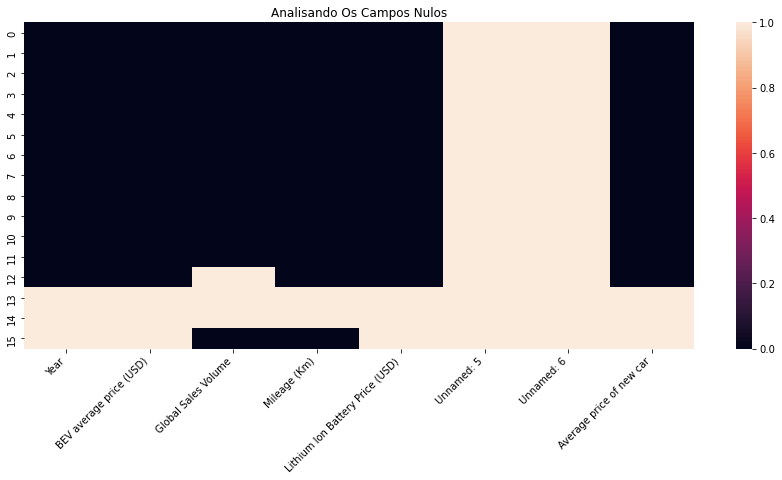

In [7]:
#Analisando os campos nulos

plt.figure(figsize=(15,6))
plt.title('Analisando Os Campos Nulos')
sns.heatmap(carros_eletricos.isnull())
plt.xticks(rotation = 45 , ha = 'right');

Podemos observar que nas colunas "Unnamed 5" e "Unnamed 6" não há nenhum valor, apenas campos nulos. E, nas linhas 14 e 15, maior parte dos dados são nulos.

In [8]:
#Removendo campos nulos
carros_eletricos.drop(['Unnamed: 5', 'Unnamed: 6'], axis = 1, inplace = True)

In [9]:
n=4
carros_eletricos.drop(carros_eletricos.tail(n).index, inplace = True)

In [10]:
#Transformando tudo em float
carros_eletricos['Global Sales Volume'] = carros_eletricos['Global Sales Volume'].astype(float)
carros_eletricos['Mileage (Km)'] = carros_eletricos['Mileage (Km)'].astype(float)

In [11]:
carros_eletricos

,Year,BEV average price (USD),Global Sales Volume,Mileage (Km),Lithium Ion Battery Price (USD),Average price of new car
0,2010.0,64032.0,50000.0,127.0,1191.0,37500.0
1,2011.0,51736.0,60000.0,139.0,924.0,37311.0
2,2012.0,52084.0,80000.0,160.0,726.0,36874.0
3,2013.0,56028.0,150000.0,189.0,668.0,37826.0
4,2014.0,44776.0,224700.0,210.0,592.0,37519.0
5,2015.0,42340.0,380100.0,211.0,384.0,38240.0
6,2016.0,46284.0,506880.0,233.0,295.0,38455.0
7,2017.0,44776.0,846210.0,267.0,221.0,38350.0
8,2018.0,41412.0,1436580.0,304.0,181.0,38365.0
9,2019.0,42804.0,1708500.0,336.0,157.0,40546.0


## Observando em gráficos

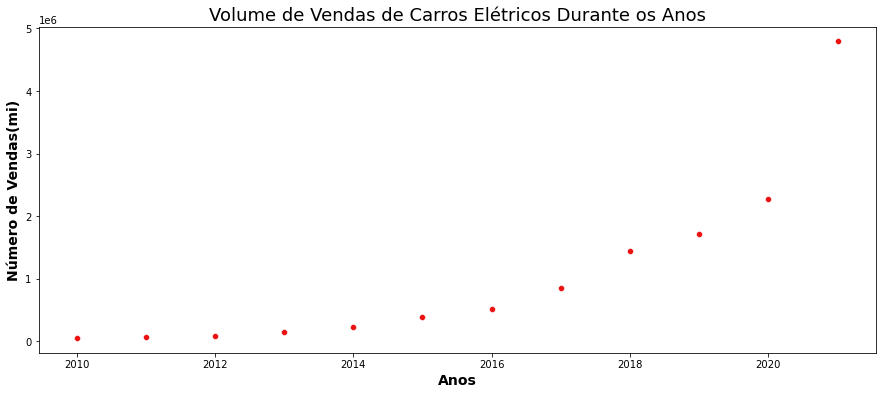

In [12]:
#Gráfico sobre volume de vendas
#Fazendo o gráfico

plt.figure(figsize = (15,6))
sns.scatterplot(data = carros_eletricos, x = 'Year', y ='Global Sales Volume', color = '#EC1212')

#Legendando o gráfico

plt.title('Volume de Vendas de Carros Elétricos Durante os Anos', fontsize = 18)
plt.ylabel('Número de Vendas(mi)', fontsize = 14, fontweight = 'bold')
plt.xlabel('Anos',fontsize= 14, fontweight = 'bold');

Podemos observar que ao longo dos anos, aumentaram as vendas de carros elétricos. Em 10 anos, o volume de vendas foi de 50.000 à 2.268.000, ou seja, um aumento de +4000%.

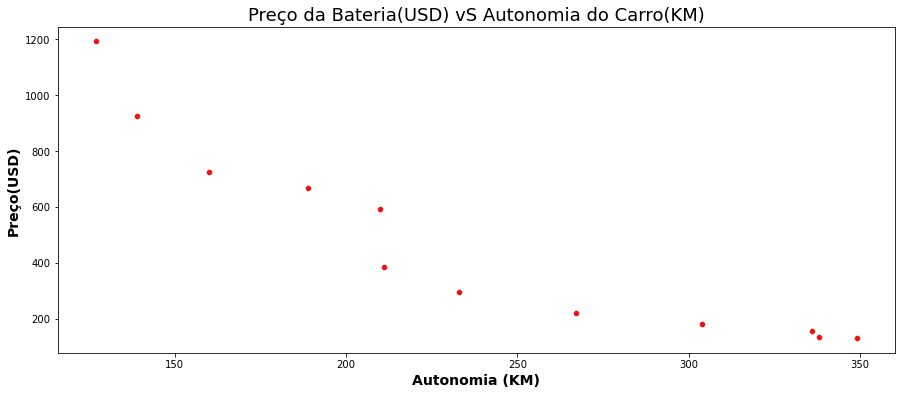

In [13]:
#Gráfico sobre vo valor da bateria vs autonomia da mesma
#Fazendo o gráfico

plt.figure(figsize = (15,6))
sns.scatterplot(data = carros_eletricos, x = 'Mileage (Km)', y ='Lithium Ion Battery Price (USD)', color = '#EC1212')


#Legendando o gráfico

plt.title('Preço da Bateria(USD) vS Autonomia do Carro(KM)', fontsize = 18)
plt.xlabel('Autonomia (KM)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Preço(USD)',fontsize= 14, fontweight = 'bold');

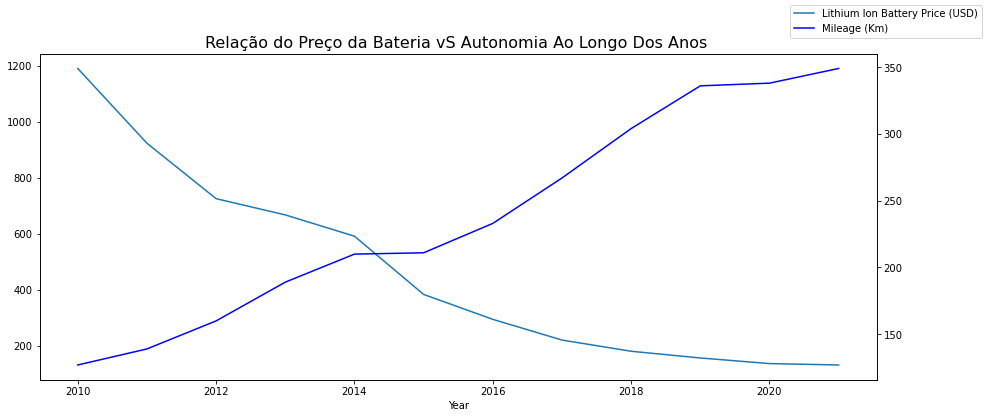

In [14]:
ax = carros_eletricos.plot(x="Year", y="Lithium Ion Battery Price (USD)", legend=False)
ax2 = ax.twinx()
carros_eletricos.plot(x="Year", y="Mileage (Km)", ax=ax2, legend=False, color="b", figsize = (15,6))
ax.figure.legend()
plt.title('Relação do Preço da Bateria vS Autonomia Ao Longo Dos Anos ', fontsize = 16);

Aqui temos uma relação inversa: a medida que a autonomia dos carros elétricos aumenta, o preço de suas baterias diminuem.

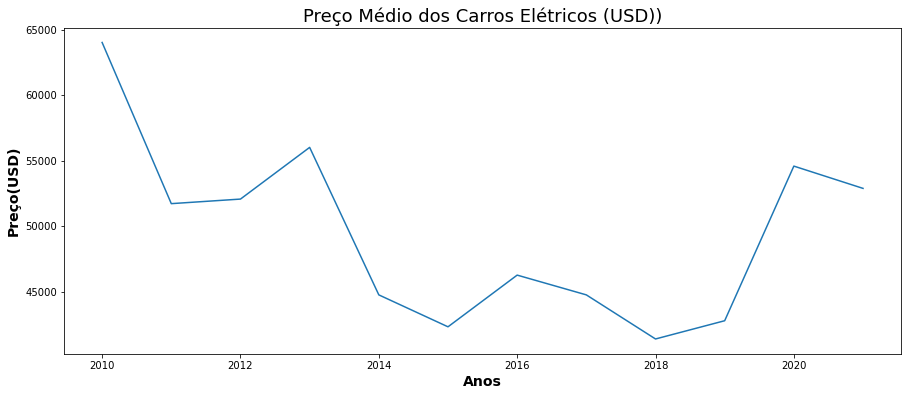

In [15]:
#Gráfico sobre vo valor da bateria vs autonomia da mesma
#Fazendo o gráfico

plt.figure(figsize = (15,6))
plt.plot(carros_eletricos['Year'],carros_eletricos['BEV average price (USD)'])


#Legendando o gráfico

plt.title('Preço Médio dos Carros Elétricos (USD))', fontsize = 18)
plt.xlabel('Anos', fontsize = 14, fontweight = 'bold')
plt.ylabel('Preço(USD)',fontsize= 14, fontweight = 'bold');

Observamos que o preço dos carros elétricos estiveram em queda, mas voltaram a aumentar nos ultimos anos.

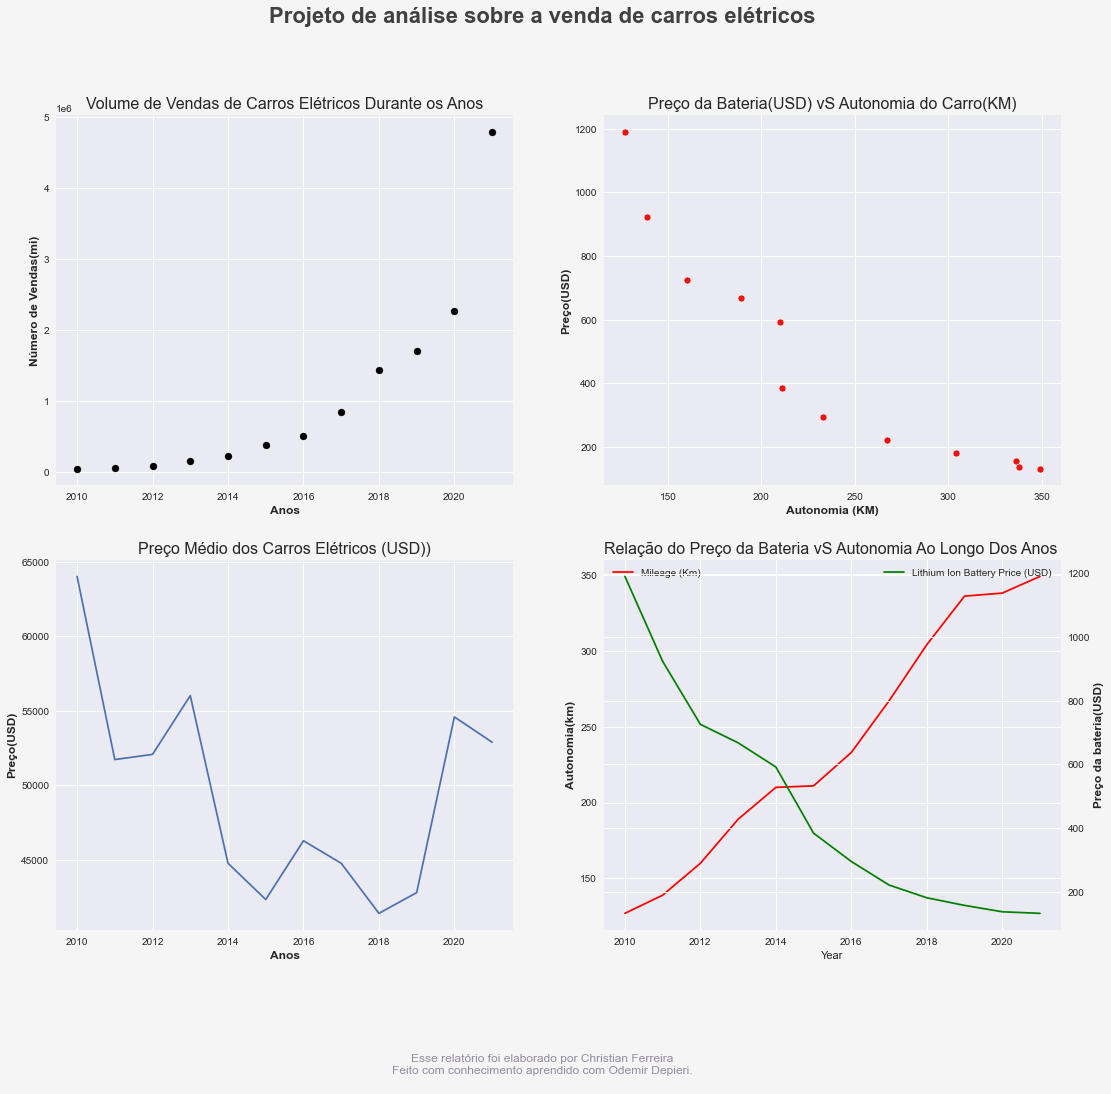

In [16]:
#Aqui montarei um relatório simples

fig, ax = plt.subplots( figsize=(18, 15) )
Cor_Fundo = '#f5f5f5'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )
plt.style.use('seaborn')
plt.suptitle('Projeto de análise sobre a venda de carros elétricos', fontsize=22, color='#404040', fontweight=600 )

#Parametros
Linhas = 2
Colunas = 2

#Primeiro Grafico
plt.subplot(Linhas,Colunas,1)
#Fazendo o gráfico
plt.scatter(carros_eletricos['Year'],carros_eletricos['Global Sales Volume'], facecolor = '#000000')
plt.title('Volume de Vendas de Carros Elétricos Durante os Anos', fontsize = 16)
plt.ylabel('Número de Vendas(mi)', fontsize = 12, fontweight = 'bold')
plt.xlabel('Anos',fontsize= 12, fontweight = 'bold')

#Segundo Grafico
plt.subplot(Linhas,Colunas,2)
#Fazendo o gráfico
sns.scatterplot(data = carros_eletricos, x = 'Mileage (Km)', y ='Lithium Ion Battery Price (USD)', color = '#EC1212')
plt.title('Preço da Bateria(USD) vS Autonomia do Carro(KM)', fontsize = 16)
plt.ylabel('Preço(USD)',fontsize= 12, fontweight = 'bold')
plt.xlabel('Autonomia (KM)', fontsize = 12, fontweight = 'bold')


#Terceiro
plt.subplot(Linhas,Colunas,3)
#Fazendo o gráfico
plt.plot(carros_eletricos['Year'],carros_eletricos['BEV average price (USD)'])
plt.title('Preço Médio dos Carros Elétricos (USD))', fontsize = 16)
plt.ylabel('Preço(USD)',fontsize= 12, fontweight = 'bold');
plt.xlabel('Anos', fontsize = 12, fontweight = 'bold')


#Quarto grafico
axis = plt.subplot(Linhas,Colunas,4)
carros_eletricos.plot(x="Year", y="Mileage (Km)", ax=axis,legend=True , color='r')
plt.ylabel('Autonomia(km)', fontsize = 12, fontweight = 'bold')
ax2 = axis.twinx()
carros_eletricos.plot(x="Year", y="Lithium Ion Battery Price (USD)", ax=ax2, legend=True, color="g")
plt.ylabel('Preço da bateria(USD)', fontsize = 12, fontweight = 'bold')
plt.title('Relação do Preço da Bateria vS Autonomia Ao Longo Dos Anos ', fontsize = 16)

# Rodapé
Rodape = '''
Esse relatório foi elaborado por Christian Ferreira
Feito com conhecimento aprendido com Odemir Depieri.
'''

# Incluindo o rodape no relatorio
fig.text( 0.5, -0.02, Rodape, ha='center', va='bottom', size=12, color='#938ca1');

## Considerações Finais

    Após essa breve análise, podemos observar e tirar uma conclusões:
    -A venda de carros elétricos vem crescendo bastante nos últimos anos;
    -O preço da bateria usada foi barateada e sua autonomia melhorada ao longo dos anos;
    -O preço dos carros elétricos teve um período de queda, mas logo em seguida houve um aumento.